In [1]:
import geopandas as gpd


In [2]:
wells=gpd.read_file("data/brogmwvolledigeset.zip")

In [6]:
fields=gpd.read_file("data/brpgewaspercelen_definitief_2020_small.gpkg")

<Axes: >

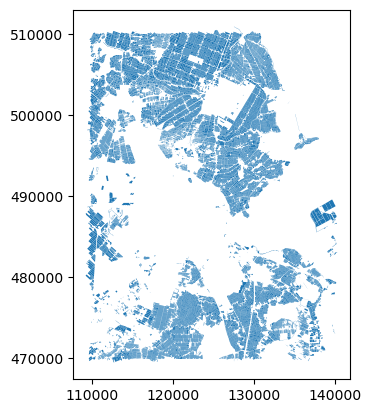

In [7]:
fields.plot()

In [11]:
# Get CRS of the fields dataset
fields.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [9]:
# Reproject wells to fields CRS
# REMARK: It produces a new object, i.e. reprojection is not in place
wells = wells.to_crs(epsg=28992)

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [10]:
# Check if CRS is changed
wells.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

<Axes: >

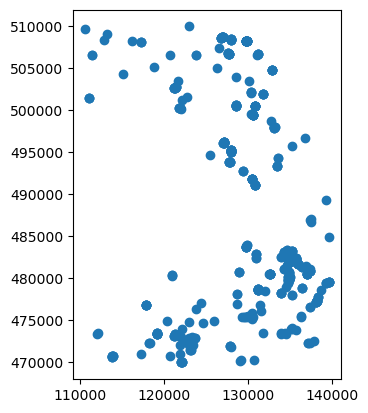

In [12]:
# Clip wells by fields
wells_clip = wells.clip(fields)

# Plot clipped wells
wells_clip.plot()

In [14]:
# Create a 50 m buffer around the fields
# REMARK: buffer() method returns a geoseries, not a geodataframe
buffer = fields.buffer(50)

In [15]:
# To get attributes, we need to create a copy of the dataset and update geometry
fields_buffer = fields.copy()
fields_buffer["geometry"] = buffer

# Dissolve field polygons to have a single polygon
fields_buffer_dissolve = fields_buffer.dissolve()

In [16]:
# Find wells intersecting with the dissolved fields
wells_buffer = wells.clip(fields_buffer_dissolve)

<Axes: >

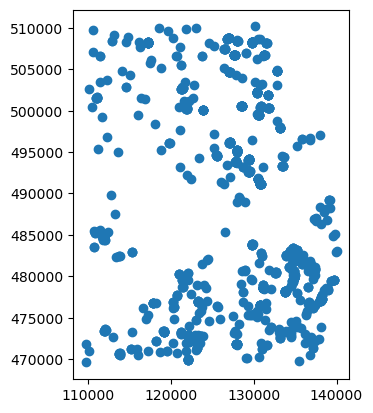

In [17]:
# Plot wells
wells_buffer.plot()

<Axes: >

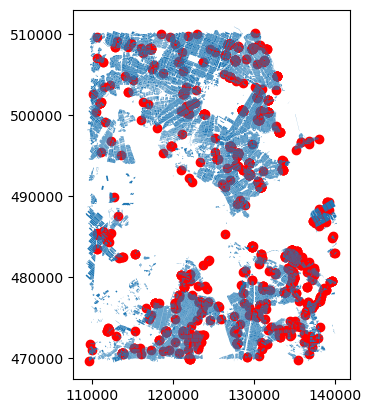

In [18]:
# Plot wells and fields
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 1)

wells_buffer.plot(ax=ax, color="r")
fields.plot(ax=ax)